In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



# Data Manipulations in PySpark

Spark Session ile PySpark kodumuzu Spark kümesine bağlar. Kodun çalışması için gerekli olan tüm yapılandırmaları oluşturur. 

In [4]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Data_Wrangling").getOrCreate()

In [5]:
# Print PySpark and Python versions
import sys
print('Python version: ' + sys.version)
print('Spark version: '+ spark.version)

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Spark version: 3.0.1


Veri manipülasyonu için data yüklemesini yapalım.

In [8]:
# Read data
file_location = "movie_data_part1.csv"
file_type = "csv"
infer_schema = "false"
first_row_is_header = "true"
delimiter = "|"

df = spark.read.format(file_type)\
.option("inferSchema", infer_schema)\
.option("header", first_row_is_header)\
.option("sep", delimiter)\
.load(file_location)

Hive'dan veri okumak için aşağıdaki komut kullanılır.

In [ ]:
df = spark.sql("select * from database.table_name")

Verimizi okuduktan sonra yapılacak ilk işlem meta verileri okumaktır. Bunun için aşağıdaki kodu kullanabiliriz.

# Reading Metadata

Metadata bilgilerini df.printSchema() komutu ile okuyabiliriz. Bunun yanısıra df.dtypes komutuylada aynı bilgileri alabiliriz.

In [9]:
df.printSchema()

root
 |-- belongs_to_collection: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- status: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)



In [10]:
df.dtypes

[('belongs_to_collection', 'string'),
 ('budget', 'string'),
 ('id', 'string'),
 ('original_language', 'string'),
 ('original_title', 'string'),
 ('overview', 'string'),
 ('popularity', 'string'),
 ('production_companies', 'string'),
 ('production_countries', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('runtime', 'string'),
 ('status', 'string'),
 ('tagline', 'string'),
 ('title', 'string'),
 ('vote_average', 'string')]

Veri tiplerini göstermeden kolonları df.columns komutuyla gösterebiliriz.

In [11]:
df.columns

['belongs_to_collection',
 'budget',
 'id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'title',
 'vote_average']

 Bir veri kümesindeki yapacağımız kontrollerden biride veri sayısıdır. Bunun için aşağıdaki komutu kullanabiliriz.

In [12]:
df.count()

43998

In [13]:
print('Toplam kayıt sayısı: ' + str(df.count()))

Toplam kayıt sayısı: 43998


# Sütünları Bölerek İncelemek

In [14]:
# İncelemek istediğimiz sütunları tanımlıyoruz.
select_columns = ['id', 'budget', 'popularity','release_date','revenue','title']

In [16]:
# Gerekli sütunlarla dataframeden alt küme oluşturma.
df = df.select(*select_columns)

In [17]:
# Aşağıdaki komutla veriyi gösterelim.
df.show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

Tüm işlemler aşağıdaki gibi tek bir satırda ifade edilebilir.

In [18]:
df.select('id','budget','popularity','release_date','revenue','title').show()

+-----+-------+------------------+------------+-------+--------------------+
|   id| budget|        popularity|release_date|revenue|               title|
+-----+-------+------------------+------------+-------+--------------------+
|43000|      0|             2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|      0|              5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|      0|              5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|      0|             7.159|  1975-03-12|      0|          F for Fake|
|43004| 500000|             3.988|  1962-10-09|      0|Long Day's Journe...|
|43006|      0|             3.194|  1962-03-09|      0|           My Geisha|
|43007|      0|             2.689|  1962-10-31|      0|Period of Adjustment|
|43008|      0|             6.537|  1959-03-13|      0|    The Hanging Tree|
|43010|      0|             4.297|  1962-01-01|      0|Sherlock Holmes a...|
|43011|      0|             4.417|  1962-01-01|      0|  Sodom and Gomorrah|

In [21]:
# gösterilecek satırı sınırlayabiliriz.
df.show(5)

+-----+------+----------+------------+-------+--------------------+
|   id|budget|popularity|release_date|revenue|               title|
+-----+------+----------+------------+-------+--------------------+
|43000|     0|     2.503|  1962-05-23|      0|The Elusive Corporal|
|43001|     0|      5.51|  1962-11-12|      0|  Sundays and Cybele|
|43002|     0|      5.62|  1962-05-24|      0|Lonely Are the Brave|
|43003|     0|     7.159|  1975-03-12|      0|          F for Fake|
|43004|500000|     3.988|  1962-10-09|      0|Long Day's Journe...|
+-----+------+----------+------------+-------+--------------------+
only showing top 5 rows



# Missing Values

Eksik değerleri bir sütun için veya birden çok sütun için hesaplaybiliriz. Üç farklı şekilde null değerleri sayabiliriz.
Buradaki komutlarda ilk olarak dataframe de bir filtre işlemi yapıyoruz. Sonrasında "|" işareti veya OR ifadesiyle şart belirliyoruz. İlk sütunda popülerlik sütununda bulunan boş ifadeleri ariyoruz. İkinci durumda null dolduğunda true değeri döndüren .isNull() operatörünü kullanırız. Üçüncü durumda NaN ifadelerini yakalamak için isnan kullandık.

In [22]:
from pyspark.sql.functions import *
df.filter((df['popularity'] == '')| df['popularity'].isNull()|isnan(df['popularity'])).count()

215

Eğer dataframe içindeki tüm eksik değerleri hesaplamak istersek aşağıdaki komutu kullanabiliriz.

In [24]:
df.select([count(when((col(c)== '')| col(c).isNull()| isnan(c),c)).alias(c) 
           for c in df.columns]).show()

+---+------+----------+------------+-------+-----+
| id|budget|popularity|release_date|revenue|title|
+---+------+----------+------------+-------+-----+
|125|   125|       215|         221|    215|  304|
+---+------+----------+------------+-------+-----+



Bu komutla tüm sütunları seçeriyoruz ve önceki eksik kontrolleri bir döngüde çalıştırıyoruz. Sonrasında eksik değerleri alt gruplar halinde gösteriyoruz.
Dikkat etmemiz gereken nokta pyspark.sql.functions içeri aktardığımızdan emin olalım.

# One-Way Frequencies

Kategorik değişkenlerin frekanslarını nasıl hesaplayabileceğimize bakalım. Öncelikle veri setimiz içinde tekrar eden başlıklar olup olmadığını aşağıdaki komutla kontrol edelim.

In [26]:
df.groupBy(df['title']).count().show()

+--------------------+-----+
|               title|count|
+--------------------+-----+
|   The Corn Is Green|    1|
|Meet The Browns -...|    1|
|Morenita, El Esca...|    1|
| Father Takes a Wife|    1|
|The Werewolf of W...|    1|
|My Wife Is a Gang...|    1|
|Depeche Mode: Tou...|    1|
|  A Woman Is a Woman|    1|
|History Is Made a...|    1|
|      Colombian Love|    1|
|        Ace Attorney|    1|
|     Not Like Others|    1|
|40 Guns to Apache...|    1|
|          Middle Men|    1|
|         It's a Gift|    1|
|    La Vie de Bohème|    1|
|Rasputin: The Mad...|    1|
|The Ballad of Jac...|    1|
|         How to Deal|    1|
|             Freaked|    1|
+--------------------+-----+
only showing top 20 rows



Yukardaki komut veri setindeki bir başlığın kaç defa tekrarlandığını göstermektedir. Sıralı şekilde görmek için aşağıdaki komutu kullanıyoruz.

In [27]:
df.groupBy(df['title']).count().sort(desc('count')).show(10,False)

+--------------------+-----+
|title               |count|
+--------------------+-----+
|null                |304  |
|Les Misérables      |8    |
|The Three Musketeers|8    |
|Cinderella          |8    |
|The Island          |7    |
|A Christmas Carol   |7    |
|Hamlet              |7    |
|Dracula             |7    |
|Frankenstein        |7    |
|Crime and Punishment|6    |
+--------------------+-----+
only showing top 10 rows



Burada tekrarlalan bir çok başlık olduğunu görüyoruz. Eksik başlık değerleri esas sorunumuz olarak görülmektedir. Gerçek dünya verileri de bu şekilde karmaşık olabilir. Burada bir ayarlama yapalım. Eksik değerleri ortadan kaldırarak ve yalnızca 4 keredan fazla tekrarlanan başlıkları filtreleyelim.

In [35]:
# Eksik değerleri ortadan kaldırmak ve geçici bir dataframe alt küme oluşturma
df_temp = df.filter((df['title'] != '') & 
                    (df['title'].isNotNull())& (~isnan(df['title'])))

In [40]:
# DataFrame de 4 defadan fazla tekrarlanan değerleri filtreleyerek dataframe oluşturma
df_temp.groupby(df_temp['title']).count().filter("count > 4").sort(col("count").desc()).show(10,False)


+--------------------+-----+
|title               |count|
+--------------------+-----+
|Les Misérables      |8    |
|The Three Musketeers|8    |
|Cinderella          |8    |
|The Island          |7    |
|Hamlet              |7    |
|A Christmas Carol   |7    |
|Dracula             |7    |
|Frankenstein        |7    |
|Beauty and the Beast|6    |
|Crime and Punishment|6    |
+--------------------+-----+
only showing top 10 rows



Azalan işlevini belirtmezsek sonuçlar varsayılan olarak artan sırada sıralanır. Aşağıdaki komutla 4 ve daha fazla tekrarlanan başlıkların sayısını bulmaktadır.

In [42]:
df.groupby(df_temp['title']).count().filter("count >4").sort(col("count").desc()).count()

44

Gecici olarak oluşturduğumuz dataframe yi aşağıdaki komutla silebiliriz.

In [43]:
del df_temp

# Casting Variables

Meta verilerden gözlemlediğimiz tüm değişkenler diziler olarak listelenir. Verileri inceledikten sonra bu alanlardan bazıları tamsayı, float veya tarih nesneleri olduğunu görüyoruz. Veri türleri doğru tanımlanmazsa bazı işlemler yanıltıcı sonuçlara yol açabilir. Analizlerimizde doğru veri türünü belirleme konusunda gerekli özeni veri türünü belirleme konusunda gerekli özeni göstermemiz gerekiyor. Şimdi değişlenlerin doğru veri türüne nasıl dönüştürüleceğini görelim.

In [44]:
# Before Casting
df.dtypes

[('id', 'string'),
 ('budget', 'string'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

Veri setindeki tüm alanların veri türü string olarak görülüyor. Burada analizlere başlamadan önce doğru veri dönüşümlerini yapmamız gerekmektedir. 

In [45]:
# Casting 
df = df.withColumn('budget', df['budget'].cast('float'))

In [46]:
# After Casting
df.dtypes

[('id', 'string'),
 ('budget', 'float'),
 ('popularity', 'string'),
 ('release_date', 'string'),
 ('revenue', 'string'),
 ('title', 'string')]

Cast fonksiyonunu kullandık. Ayrıca ek olarak burada .withColumn kullandık. Bu komut PySpark'ta kullanılan en yaygın fonksiyonlardan biridir. Bu fonksiyon veri türlerinin değerlerini güncellemek, yeniden adlandırmak ve veri dönüşümü için kullanılmaktadır. Burada bu fonksiyonu birden çok sütuna nasıl genişletebileceğimizi aşağıda gösteriyoruz. Veri türlerini bildiğimizi varsayalım. Bu durumda dönüştürülecek değişkenler listesi oluşturabilir ve bunları döngüde kullanabiliriz.

In [47]:
# Importing necessary libraries
from pyspark.sql.types import *


In [61]:
# Identifying and assignig lists of variables
int_vars = ['id']
float_vars = ['budget','popularity', 'revenue']
date_vars = ['release_date']

# Converting integer variables
for column in int_vars:
     df=df.withColumn(column,df[column].cast(IntegerType()))
        
for column in float_vars:
     df=df.withColumn(column,df[column].cast(FloatType()))
        
for column in date_vars:
     df=df.withColumn(column,df[column].cast(DateType()))

In [62]:
# Data types of all variables aftes casting
df.dtypes

[('id', 'int'),
 ('budget', 'float'),
 ('popularity', 'float'),
 ('release_date', 'date'),
 ('revenue', 'float'),
 ('title', 'string')]

In [63]:
df.show(10,False)

+-----+--------+----------+------------+-------+---------------------------------------+
|id   |budget  |popularity|release_date|revenue|title                                  |
+-----+--------+----------+------------+-------+---------------------------------------+
|43000|0.0     |2.503     |1962-05-23  |0.0    |The Elusive Corporal                   |
|43001|0.0     |5.51      |1962-11-12  |0.0    |Sundays and Cybele                     |
|43002|0.0     |5.62      |1962-05-24  |0.0    |Lonely Are the Brave                   |
|43003|0.0     |7.159     |1975-03-12  |0.0    |F for Fake                             |
|43004|500000.0|3.988     |1962-10-09  |0.0    |Long Day's Journey Into Night          |
|43006|0.0     |3.194     |1962-03-09  |0.0    |My Geisha                              |
|43007|0.0     |2.689     |1962-10-31  |0.0    |Period of Adjustment                   |
|43008|0.0     |6.537     |1959-03-13  |0.0    |The Hanging Tree                       |
|43010|0.0     |4.297

# Descriptive Statistics

Veriyi analiz etmek için veri türü, dağılımı ve dağılım hakkında detaylı bilgilere sahip olmamız gerekiyor. Spark'ta hızlı bir şekilde bunu yapabileceğimiz 'descripe' fonksiyonu bulunmaktadır. Spark'taki bu fonksiyon her sütun için ortalama, standart sapma ve minimum ve maksimum değerler için  eksik olmayan değerlerin sayısını verdiğinden çok kullanışlı bir fonksiyondur. 


In [65]:
df.describe().show()

+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|summary|                id|              budget|       popularity|            revenue|               title|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+
|  count|             43784|               43873|            43783|              43783|               43694|
|   mean|44502.304312077475|   3736901.834963167|5.295444259579189|  9697079.597382545|            Infinity|
| stddev|27189.646588626394|1.5871814952777326E7|6.168030519208252|5.687938449628811E7|                 NaN|
|    min|                 2|                 0.0|              0.6|                0.0|!Women Art Revolu...|
|    max|            100988|               3.8E8|            180.0|       2.78796518E9|       시크릿 Secret|
+-------+------------------+--------------------+-----------------+-------------------+--------------------+



Buradaki ortalama merkezi eğilim ölçüsü olan artimetik ortalamadır. Ortalama birçok işlem için iyi bir tahmin edicidir fakat aykırı değerlerden etkilenmektedir. Aykırı değerler ortalama üzerinde olumsuz etkilere sahiptir. Median (ortanca) aykırı değerlerden etkilenmediği için daha iyi bir tahmin edicidir ancak hesaplanma maliyeti yüksektir. Spark'ta da bu işlemin maliyeti yüksektir. Sıralama işlemi yapılacağı için yinede hesaplama maliyeti açısından olumsuz bir durum oluşmaktadır. Spark bu işlemi daha hızlı yapmak için Greenwald-Khanna algoritmasının bir varyantını kullanmaktadır. Medyanı hesaplamak için kullanılan işlev approxQuantile'dir. 

Medyan hesaplanırken verilmesi gereken 3 parametre vardır. Bu parametreleri'.approxQuantile' fonksiyonunda girmemiz gerekmektedir. <p>
'col': Sayılsal sütun adı<p>
'probabilities': Olasılık listesi. Burada vereceğimiz değer 0-1 arasında olmalıdır. Örneğin, 0 minimum, 0.5 medyan, 1 maksimumdur. <p>
'relativeError': Hesaplamanın kesinliği ayarlanmaktadır (>=0). 0 olarak ayarlanmışsa, kesin bir hesaplama yapılır ve hesaplama maliyeti yüksektir. 1'den büyük değerlerin kabul edilmektedir ama 1 ile aynı sonucu vermektedir.

'budget' sütunu için medya hesaplamayı deneyelim.

In [79]:
#Öncelikle 'budget' bilinmeyen değerleri 0 olarak işaretlendiğinden,
# medyanı hesaplamadan önce bu değerleri filtreleyelim.
df_temp = df.filter((df['budget'] != 0) & (df['budget'].isNotNull()) & (~isnan(df['budget'])))

In [80]:
# Burada ikinci parametre 0.5 değeri medyan değerini gösterir.

median = df_temp.approxQuantile('budget', [0.5], 0.1)

In [81]:
print('The median of budget is ' + str(median))

The median of budget is [5000000.0]


Birden fazla sütunun medyanın aynı anda hesaplamak için listeye ilk parametreyi değiştirmemiz yeterlidir.

# Unique/Distinct Values and Counts

Bazen bir değişkendeki düzeylerin sayısını öğrenmek isteyebiliriz. Spark'ta bunu countDistinct fonksiyonunu kullanarak yapabiliriz.

In [82]:
# Farklı başlıklarını sayalım
df.agg(countDistinct(col('title')).alias('count')).show()

+-----+
|count|
+-----+
|41138|
+-----+



In [83]:
# Farklı fonksiyonları kullanarak başlık sayımını yapabiliriz
df.select('title').distinct().show(10,False)

+---------------------------------------------+
|title                                        |
+---------------------------------------------+
|The Corn Is Green                            |
|Meet The Browns - The Play                   |
|Morenita, El Escandalo                       |
|Father Takes a Wife                          |
|The Werewolf of Washington                   |
|My Wife Is a Gangster                        |
|Depeche Mode: Touring the Angel Live in Milan|
|A Woman Is a Woman                           |
|History Is Made at Night                     |
|Colombian Love                               |
+---------------------------------------------+
only showing top 10 rows



Yıllara göre farklı başlıklara bakmak için aşağıdaki kodu kullanabiliriz.

In [84]:
# Extracting year from release date
df_temp = df.withColumn('release_year', year('release_date'))

In [85]:
# Extracting month
df_temp = df_temp.withColumn('release_month', month('release_date'))

# Extracting day of month
df_temp = df_temp.withColumn('release_day', dayofmonth('release_date'))


In [86]:
# Yıllara göre başlık sayısının hesaplanması
df_temp.groupBy('release_year').agg(countDistinct('title')).show(10,False)

+------------+------------+
|release_year|count(title)|
+------------+------------+
|1959        |271         |
|1990        |496         |
|1975        |365         |
|1977        |415         |
|1924        |19          |
|2003        |1199        |
|2007        |1896        |
|2018        |4           |
|1974        |434         |
|2015        |13          |
+------------+------------+
only showing top 10 rows



# Filtering

Bu fonksiyon Spark'taki önemli fonksiyonlardandır. SQL'de 'where' fonksiyonuyla ayndır. 'filter' standart Scala'daki adıdır.

.where() = .filter()

Daha önce filtre veya koşulları kullanarak verilerimizi filtreleme yapmıştık. Burada verileri filtrelemek için farklı yolları deneyelim. Örneğin, 'Meet' ile başlayan tüm başlıkları listelemeyi deneyelim. SQL kullanıyorsanız bu işlemi SQL benzer şekilde yapabilirsiniz. PySpark bu amaçla kullanılabilecek regex fonksiyonlarını bizlere sunmaktadır. 

In [87]:
df.filter(df['title'].like('Meet%')).show(10,False)

+-----+---------+----------+------------+-----------+--------------------------+
|id   |budget   |popularity|release_date|revenue    |title                     |
+-----+---------+----------+------------+-----------+--------------------------+
|43957|500000.0 |2.649     |2005-06-28  |1000000.0  |Meet The Browns - The Play|
|39997|0.0      |3.585     |1989-11-15  |0.0        |Meet the Hollowheads      |
|16710|0.0      |11.495    |2008-03-21  |4.1939392E7|Meet the Browns           |
|20430|0.0      |3.614     |2004-01-29  |0.0        |Meet Market               |
|76435|0.0      |1.775     |2011-03-31  |0.0        |Meet the In-Laws          |
|76516|5000000.0|4.05      |1990-11-08  |485772.0   |Meet the Applegates       |
|7278 |3.0E7    |11.116    |2008-01-24  |8.4646832E7|Meet the Spartans         |
|32574|0.0      |7.42      |1941-03-14  |0.0        |Meet John Doe             |
|40506|0.0      |4.814     |1997-01-31  |0.0        |Meet Wally Sparks         |
|40688|2.4E7    |6.848     |

Şimdi 's' ile bitmeyen başlıkları bulalım.

In [91]:
# İçerisinde 'ove' ifadesini geçtiği başlıkları bulalım.

df.filter(df['title'].rlike('\w*ove')).show(10,False)

+-----+------+----------+------------+------------+------------------------+
|id   |budget|popularity|release_date|revenue     |title                   |
+-----+------+----------+------------+------------+------------------------+
|43100|0.0   |7.252     |1959-10-07  |0.0         |General Della Rovere    |
|43152|0.0   |5.126     |2001-06-21  |0.0         |Love on a Diet          |
|43191|0.0   |4.921     |1952-08-29  |0.0         |Beware, My Lovely       |
|43281|0.0   |2.411     |1989-11-22  |0.0         |Love Without Pity       |
|43343|0.0   |3.174     |1953-12-25  |0.0         |Easy to Love            |
|43347|3.0E7 |14.863    |2010-11-22  |1.02820008E8|Love & Other Drugs      |
|43362|0.0   |1.705     |1952-02-23  |0.0         |Love Is Better Than Ever|
|43363|0.0   |2.02      |1952-05-29  |0.0         |Lovely to Look At       |
|43395|0.0   |4.758     |1950-11-10  |0.0         |Two Weeks with Love     |
|43455|0.0   |4.669     |1948-08-23  |0.0         |The Loves of Carmen     |

In [94]:
df.filter(df['title'].rlike('\w*ook')).show(10,False)

+-----+--------+----------+------------+-----------+--------------------------------+
|id   |budget  |popularity|release_date|revenue    |title                           |
+-----+--------+----------+------------+-----------+--------------------------------+
|43363|0.0     |2.02      |1952-05-29  |0.0        |Lovely to Look At               |
|43400|0.0     |1.254     |2008-01-01  |0.0        |Pressure Cooker                 |
|43796|0.0     |3.486     |1941-10-24  |0.0        |Spooks Run Wild                 |
|43822|0.0     |3.87      |1940-01-22  |0.0        |The Stars Look Down             |
|21284|0.0     |1.36      |1994-10-07  |0.0        |The Snooks in the Limelight     |
|21358|0.0     |6.312     |2009-08-29  |0.0        |Merlin and the Book of Beasts   |
|21509|210000.0|8.035     |2008-04-01  |0.0        |The Cook                        |
|21845|0.0     |9.402     |1993-07-07  |5.3579268E7|Rookie of the Year              |
|21874|0.0     |6.491     |1981-10-30  |3282232.0  |Lo

Burada örnekleri kendiniz çoğaltabilirsiniz. Şimdi regex ile ilgili çok sık kullanacağınız kısa bilgileri paylaşalım. <p>
Regex de kullanılan meta karakteriler aşağıdaki gibidir:

Tek karakterler: 
<li> \d: 0-9 arasındaki sayıları tanımlar </li>
<li> \w: 0'dan 9'a kadar sayırları ve tüm büyük ve küçük harfleri tanımlar </li>
<li> \s: Boşluk </li>
<li> .(nokta): Herhangi bir karakter </li>

Ayrıca kaç karakterin aranacağını ayarlayabileceğimiz ifadeleri kullanabiliriz.
<li> *: 0 veya daha fazla karakter
<li> +: 1 veya daha fazla karakter
<li> ?: 0 veya 1 karakter 
<li> {min,max}: min ve max değerleri dahil aralık arasındaki tüm karakterleri
<li> {n}: Tam olarak n karakter  

# Creating New Columns
Yeni sütunlar oluşturmak için Spark'ta birçok yöntem kullanılmaktadır. En basit yöntem withColumn fonksiyonudur. 'popularity' değişkeni için varyans hesaplamak istediğimizi varsayalım. Varyans, verilerin ortalamadan ne kadar uzağa yayıldığının bir ölçüsüdür. Ortalamayı hesaplayarak varyans hesaplamasına başlayalım. Varyans formülü:
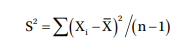

In [96]:
mean_pop=df.agg({'popularity': 'mean'}).collect()[0]['avg(popularity)']
count_obs= df.count()

Varyans formülünden anlaşılacağı gibi her bir gözlemden ortalamayı çıkarmamız gerekiyor. Bu işlemi "withColumn" ve "lit" fonksiyonunu kullanarak yapabiliriz. Lit fonksiyonu, sütuna göre değişmeyen değerlerle işlem yapmamızı sağlıyor. DataFrame doğrudan sabit değer ekleme için kullanılan bir fonksiyondur.

In [98]:
df = df.withColumn('mean_popularity', lit(mean_pop))

In [100]:
df.show(5)

+-----+--------+----------+------------+-------+--------------------+-----------------+
|   id|  budget|popularity|release_date|revenue|               title|  mean_popularity|
+-----+--------+----------+------------+-------+--------------------+-----------------+
|43000|     0.0|     2.503|  1962-05-23|    0.0|The Elusive Corporal|5.295444259579189|
|43001|     0.0|      5.51|  1962-11-12|    0.0|  Sundays and Cybele|5.295444259579189|
|43002|     0.0|      5.62|  1962-05-24|    0.0|Lonely Are the Brave|5.295444259579189|
|43003|     0.0|     7.159|  1975-03-12|    0.0|          F for Fake|5.295444259579189|
|43004|500000.0|     3.988|  1962-10-09|    0.0|Long Day's Journe...|5.295444259579189|
+-----+--------+----------+------------+-------+--------------------+-----------------+
only showing top 5 rows



Varyans formülündeki kare alma işlemi gerçekleştirmemiz gerekiyor. Bunun için PySpark'ta "pow" fonksiyonunu kullanabiliriz. "pow" fonksiyonu sayının belirttiğimiz kuvvetini almamızı sağlamaktadır.  Formülden de anlaşılacağı üzere burada kare almamız gerekiyor bunun için pow fonksiyonuna parametre olarak 2 değerini veriyoruz

In [102]:
df = df.withColumn('varaince',pow((df['popularity']-df['mean_popularity']),2))

In [103]:
variance_sum = df.agg({'varaince': 'sum'}).collect()[0]['sum(varaince)']

In [106]:
varaince_population = variance_sum/(count_obs-1)
varaince_population

37.858688057662825

Konunun pekişmesi açısından hem 'budget' hemde 'popularity' değişkenleri için yüksek, orta ve düşük olarak değerleri sınıflandırmak istediğimizi varsayalım. İlk yapacağımız iş bu etiketler için eşik değerlerinin berlirlemektir. Bir Python fonksiyonu yazarak bu işlemi gerçekleştirelim.

In [109]:
def new_cols(budget,popularity):
    if budget < 10000000: 
        budget_cat = 'Small'
    elif budget < 100000000: 
        budget_cat = 'Medium'
    else:
        budget_cat = 'Big'
        
    if popularity < 3: 
        ratings = 'Low'
    elif popularity < 5: 
        ratings = 'Mid'
    else:
        ratings = 'High'
    return budget_cat, ratings

PySpark'ta yeni bir kolon oluştururken yeni oluşturuan kolonların değişken tiplerini belirleyebiliyoruz.

StructType nesneleri Spark DataFrames şemasını tanımlamak için kullanılmaktadır. StructType nesneleri bir DataFrame'deki her sütun adı, türü, null değer olabilme gibi seçenekleri tanımlamamıza imkan veren bir StructField nesnesini içermektedir. 
Birden çok değer döndürmemiz gereken durumlarda StructType yapısını kullanabiliriz.

In [114]:
# Örnek uygulama
udfB = udf(new_cols, StructType([StructField('budget_cat', StringType(), True),StructField('ratings', StringType(),True)]))

In [115]:
temp_df = df.select('id','budget','popularity').withColumn('newcat',udfB('budget','popularity'))

In [116]:
# Unbundle the struct type columns into individual columns and drop the struct type
df_with_newcols = temp_df.select('id','budget','popularity','newcat').withColumn('budget_cat', temp_df.newcat.getItem('budget_cat')).withColumn('ratings', temp_df.newcat.getItem('ratings')).drop('newcat')
df_with_newcols.show(15,False)

+-----+---------+----------+----------+-------+
|id   |budget   |popularity|budget_cat|ratings|
+-----+---------+----------+----------+-------+
|43000|0.0      |2.503     |Small     |Low    |
|43001|0.0      |5.51      |Small     |High   |
|43002|0.0      |5.62      |Small     |High   |
|43003|0.0      |7.159     |Small     |High   |
|43004|500000.0 |3.988     |Small     |Mid    |
|43006|0.0      |3.194     |Small     |Mid    |
|43007|0.0      |2.689     |Small     |Low    |
|43008|0.0      |6.537     |Small     |High   |
|43010|0.0      |4.297     |Small     |Mid    |
|43011|0.0      |4.417     |Small     |Mid    |
|43012|7000000.0|4.722     |Small     |Mid    |
|43013|0.0      |2.543     |Small     |Low    |
|43014|0.0      |4.303     |Small     |Mid    |
|43015|0.0      |3.493     |Small     |Mid    |
|43016|0.0      |2.851     |Small     |Low    |
+-----+---------+----------+----------+-------+
only showing top 15 rows



In [124]:
#  New Columns - Observe Metadata
temp_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- newcat: struct (nullable = true)
 |    |-- budget_cat: string (nullable = true)
 |    |-- ratings: string (nullable = true)



Bu işlemlerin aynısını when fonksiyonuyla da yapabiliriz. Bu fonksiyonu kullanmanın en önemli avantajı çıktı veri türünün tanımlamaya gerek olmamasıdır. Bu fonksiyon hızlı ve karmaşık işlemler için kullanılmaktadır. When fonksiyonunu kullanarak önceki işlemleri yeniden yapmaya çalışalım.

In [125]:
#  New Columns - Method 3
df_with_newcols = df.select('id','budget','popularity').\
withColumn('budget_cat', when(df['budget']<10000000,'Small').when(df['budget']<100000000,'Medium').otherwise('Big')).\
withColumn('ratings', when(df['popularity']<3,'Low').when(df['popularity']<5,'Mid').otherwise('High'))

# Deleting and Renaming Columns
Drop fonksiyonunu kullanarak her zaman herhangi bir sütunu silebiliriz. Sonucu "printSchema" fonksiyonuyla görebiliriz.

In [117]:
columns_to_drop = ['budget_cat']
df_with_newcols = df_with_newcols.drop(*columns_to_drop)

In [126]:
df_with_newcols.printSchema()

root
 |-- id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- budget_cat: string (nullable = false)
 |-- ratings: string (nullable = false)



Kolonlara yeniden isim vermek için "withColumnRenamed" fonksiyonu kullanılmaktadır. 

In [127]:
df_with_newcols = df_with_newcols.withColumnRenamed('id','film_id').withColumnRenamed('ratings','film_ratings')

In [128]:
df_with_newcols.printSchema()

root
 |-- film_id: integer (nullable = true)
 |-- budget: float (nullable = true)
 |-- popularity: float (nullable = true)
 |-- budget_cat: string (nullable = false)
 |-- film_ratings: string (nullable = false)



# Veri manipülasyonuna giriş dersi burada tamamlandı.
Sonraki derste veri işlemenin detaylarına değinilecektir.